In [4]:
using DrWatson
@quickactivate "BNP2"
using Turing, BSON
using StatsPlots: StatsPlots
const splot = StatsPlots.plot
using Revise, BNP2

┌ Info: Precompiling BNP2 [11504357-4fe5-5405-981c-8cd43ea31635]
└ @ Base loading.jl:1273


In [5]:
args = (
    dt        = 0.1,
    σ         = 0.1,
    alg       = NUTS(100, 0.65),
    n_samples = 200,
)

;

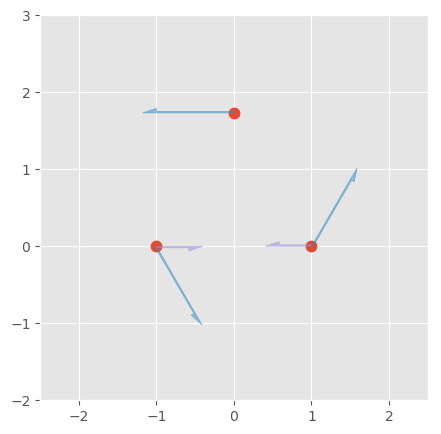

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAB0f21kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAACqBliIQAN//+9vD+BTY7mNCX\nEc3onTMfvxW4ujQ3vc4AAAMAAAMADuPlocG+vHIc0AAAWwAGWbfzhEj8xQEA3Pb/v95Fxto07V/I\nWQOh26ujrV8O6+MugcEpCsPPQPNSRO17ZaKxBe1QvQ9ODo0qwaAMv0MGg7yK7acoO59SQ63DyFLy\n7R0lYFNyAzWS+P0WXuuBY0uTlLHZDBqRzxTupbGelEU/IzySty7yiWMA6bIG+igqjfgp0O45nXMc\nojPppo/YZqHCBqJTGSZo69ebsvW3gd8wLVqydhT15wKTAv4AAAMANkULUcv2JFsQOc8HieWNmnYu\nB5VsilhQ//LslJd4Sd0ZMrENE6vzThcqJXti2S9OYgNdnFTD9BVK8x8vpHwJ3X4rHL1ST3/ovE6i\nb2EMn028pDLHqKsEBF3qiyp3Ky+HO0hLI08qnIOMhjxKzXOMylSgPTLhD6yGhI3ov9Qit/g754vE\nBGqtwYvcwQ/3kMMJ4KKGVcATyvKBD+aKf7b/e7QmSxrPfJfeuUAAAAMAAZmIA5PZPd1baXJ7vudX\n+ALQz65sSjJ5FY3lZXdrfVReB/gAp3YGL0FB3JqT77Nl0lJSbNrySGuo5fXjEP0h+VCsDzzgF0xE\nNoW0JkMKx/pdctgvWroW9a2pwilP6bUy1PNSCa6d02pu/AUoaOSVHc0VagVcTdzmlbnSUEe3QpfS\n2rUUR/9gR9vgh0YRBGOJMjJ5xofzUqS6WaOmgRXPcnaEwWVPFcypNF7MxnaJARsxnBmaGeMEWWSE\nB3syT5H5W7+7a9iYrZzHdrhk7l9Z81xdbrDFuerRuWBXKf39Ob+7/cG6hm/QpR/ZQeU7qonPiSP7\nyxP/aOAAA/CJsDzzdIPYAAC+ka2L80gw8kNP+Tvn78cOvuHS5KpW1HSxLzetEPGlAs/U2dPKHdbv\nMSS60SRAc+orhU7PmvkK093CvBVFLPXFh8wg/rtJWYoABACPCjuSRMG9MOCO2jp0ZKR/PAWpUNXf\n7d5OJtBdJVHoAjaBhO+ONYbywesKOuZqRK3VWcOU0oWynY/iqAuxi7bDOYoQkX0K/+DyGO9CstJ3\ndoNpdCUairj15cllRk8cWZsZ+vNk2wgrgkeDIg492Pq4wzUS67wcezUmvIsxGWBZZ3TLKDfa2oyq\nQtBlhIogal6kgmYc5aw2Nnb/SXRYh+zQzMpboa51EVC2MmMP1ZawxtyZh+WsAABRkVNgjMmJuvAA\nAEAYOuXX6gMZwmgeHEemuRd6XUIbAE+dgsQsNF2AkTM7QOdI3nO88sQwbK6ErkQU3COYlEyKpsWI\n7RUH+ZeHiFSd+5oxVDVB0jZrdFZSmdAOPgsB4M1gxInl5C06zZstW75kNhhEXfMwwfjrnnMMvFZO\npmkSv+Vhvogk+Buh5Fz6j7FYvqmCIkL4qmInOAz3MY+UrWXfFhmpOn3c97miMdJjCiFJ0SB3M5b0\nOzki3JWnwUzCQT1lzuwFcv2nt4D9v1l+X1cIUd/t81E1JzwJtJZcG0FFQzv4phS5l3GmM94a+oSr\nt4ucV+24nSX7Bp9Kj0zB2OsOTF5hUwmx1fLFYXvC17fVxXz/GXvWpfIE5YbKwmgVAqY0IlEIVWIQ\nBG8ojCMEuFsllYnD3KkVqsMnkZ8MI74+/r9olkC56cUUnKzKtJXWl0HpqFuzdGpD5/9bauvF2ShA\nbmL355XdCgYv8hxJ+OmpaeDXF9B9RVNj9j5uaGhy06EN/zlLN6jOcd7CUFNMHHP/sRLyZe+4x4xA\nnvbfeb6kOfg3HxWl2VuuIyLv704LXwwyGZQODBvvNyZeAA5t08fL5/XqQg55fpXdKK3rQ/OCCFNt\n9OQFqTqsCzDePFYZ5/jkgAABWlWv6f2cKwCZDrEKKSFJlzUcey/SKBrBAUOOkl/9V5M8pMyCKYt5\nN0Xpj5pJYy+oNLRX235PG22hkAxtgjG8Bc0FDKZedkdAlcunNq56re1VAG4JhbNOcavScG7rhyTj\nFuWscVAstrV/41faeCK+dGirpldAOZyxFEzA3jnObaP8MyBYa+4pJ591c/bq+RvLk/5QfjyBXDic\n0db+zuXTN89x9krwCXeawNkFvCDIkKyvrV9UUAPVV+rMf6u0BnIk+kTGiMbnfKV4HfLJqxJ6damA\nBc52E9IMsaD5E6JqLOt1yO7Uuy5mrF8x78AOVtCijVooFTzScZvOltppJQb2AGhPN0QBwfg73mRT\nXzhvin0wl18b0BbjQY4ufdPDgTeBHpS2X6vBUxk5Zc4BbmXwzrIxzpjjHDlUzTO2PyQbLRid7xW1\n6sA8LvK3TOkonUsDgopSu4slPFb+O6e7Rex5DTR5gFJUHdQP4Cb/IS2rEI1HTbQMxm25Z9N42pC/\nmtbH2jSetmgmdTGlPAjZQddGTcqqX70yiJTYVB6n+kC9SNxerIWRIf154syAHyqd+7Zm3ml0K3Ws\nOytXOtmzhsikaNZ+oqqkvHVMVb7z2E0Sb5UhCFd2t9w7pwXGDbqvcIlUiWk4V9fu679eiIe21d5E\nKyHf2ADQlVFs5bPq55jSy6Tq5J1GY3md3wZrv0px8oaorWLvT1a47o/ZHcDLPJhLcP8qPdNTCkem\n5DmtHAQ8SMFJC0wiIDrqi9CMSTtPxus/bzymPs8S3CdP2yzRCuTiK879bSrKDazOE0mxacC71oa9\n7n4YSZ8FfH6iUG3EwJoGMoGWyPoD/biuVwNLI1Kc91n7dV85D/VUzAzq4Y9GX1gdI0cMYTGHwwQ4\n3UV/gES7m0TNA7BL829WaEPPe1lHzbJ8kOmuh7UCMriz5B

┌ Info: 
│   positionof(space) = [-1.0, 0.0, 1.0, 0.0, 0.0, 1.7320508075688772]
│   velocityof(space) = [0.5000000000000001, -0.8660254037844386, 0.5000000000000001, 0.8660254037844386, -1.0, 1.2246467991473532e-16]
│   stateof(space) = [-1.0 0.0 1.0 0.0 0.0 1.7320508075688772; 0.5000000000000001 -0.8660254037844386 0.5000000000000001 0.8660254037844386 -1.0 1.2246467991473532e-16]
│   accelerationof(space) = [1.25143125, 0.7225141690598099, -1.25143125, 0.7225141690598099, 0.0, -1.4450283381196198]
└ @ Main In[6]:24


In [6]:
data =
let ms = fill(5e10, 3),
    qs = [[-1,  0],[ 1,  0], [ 0, √3]],
    ps = [
        [cos(π/3), -sin(π/3)], 
        [cos(π/3),  sin(π/3)], 
        [cos(π/1),  sin(π/1)]
    ] .+ [[0.0, 0.0]],
    T = 50
    
    objs = Particle.(ms, qs, ps)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.set_xlim([-2.5, 2.5])
    ax.set_ylim([-2.0, 3.0])
    plot!(ax, objs[1]; do_plotvelocity=true)
    plot_force!(ax, objs[1], forceof(objs[1], objs[2]))
    plot!(ax, objs[2]; do_plotvelocity=true)
    plot_force!(ax, objs[2], forceof(objs[2], objs[1]))
    plot!(ax, objs[3]; do_plotvelocity=true)
    fig |> display
   
    space = Space(objs)
    @info "" positionof(space) velocityof(space) stateof(space) accelerationof(space)
    
    traj = simulate(space, DiffEqSimulator(args.dt), 2T)
    HTML(animof(positionof.([space, traj...])).to_html5_video()) |> display
    
    traj = traj[1:T]
    states = add_gaussiannoise(vec.(stateof.(traj)), args.σ)
    (objs0=objs, traj=traj, states=states)
end

;

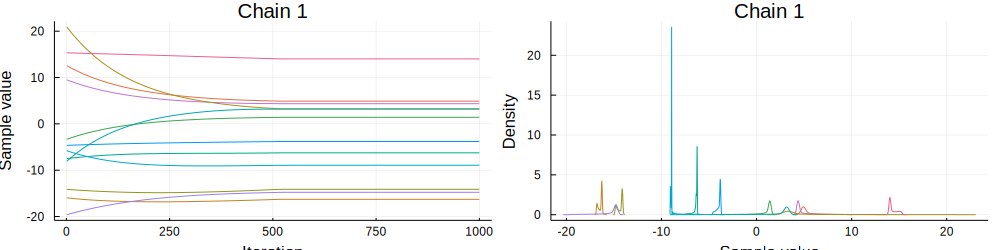

 19.581582 seconds (75.67 M allocations: 13.809 GiB, 14.91% gc time)


In [38]:
@model three_body(ms, states, dt) = begin
    q ~ MvNormal(zeros(6), 10)
    p ~ MvNormal(zeros(6), 10)
    space = Space(Particle.(ms, q, p))
    for i in 1:length(states)
        space = transition(space, dt)
        states[i] ~ MvNormal(vec(stateof(space)), 1e-1)
    end
end

@time chn = sample(three_body(massof.(data.objs0), data.states, args.dt), args.alg, args.n_samples)

splot(chn; colordim=:parameter) |> display

bson(datadir("three_body-noise=$(args.σ).bson"), chn=chn)

;

In [39]:
let n_mc = 50, T = 100, do_mean = true, res = get(chn[end-n_mc+1:end], [:q, :p])
    Q = Matrix{Float64}(hcat(res.q...)')
    P = Matrix{Float64}(hcat(res.p...)')
    if do_mean
        Q = mean(Q; dims=2)
        P = mean(P; dims=2)
    end
    Q̂ = zeros(6, T)
    for i in 1:size(Q, 2)
        q, p = Q[:,i], P[:,i]
        space = Space(Particle.(data.ms, q, p))
        traj = simulate(space, args.dt, T)
        Q̂ = Q̂ + hcat(positionof.(traj)...)
    end
    Q̂ = Q̂ / size(Q, 2)
    HTML(animof(Q̂).to_html5_video()) |> display
end

;

HTML{String}("<video width=\"500\" height=\"500\" controls autoplay loop>\n  <source type=\"video/mp4\" src=\"data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAACfxm1kYXQAAAKhBgX//53cRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENv\ncHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9w\ndGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1o\nZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2\nIGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0\nX3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE2IGxvb2thaGVhZF90aHJlYWRz\nPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50ZXJsYWNlZD0wIGJsdXJheV9j\nb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBiX3B5cmFtaWQ9MiBiX2FkYXB0\nPTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29wPTAgd2VpZ2h0cD0yIGtleWlu\ndD0yNTAga2V5aW50X21pbj0yMCBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9va2Fo\nZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0wLjYwIHFwbWluPTAgcXBtYXg9\nNjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAADuZliIQAL//+9q78yytHC5Uu\nHVl7tnQ0hiUcL3KlyxcEAAADAAADABYenZWKIPLlumAAAHbACfnN5Yhq5A9yEtMu8fq6QZ+Abp2O\nHr39F7K4TrS+rspr9wu36F3LWWVpBLbx5XHEPlau/Z3z+pswLodgZi+9xWXC63lNF5vpFwkL0YjW\nhb+Rs9gJ7pYBCq8N6cuGJFTRDsYxISLF0o8k+oHMl7cO5vOq4A7AUaPzlypjiisZI0TauhEJmTsZ\nDoD8TuizZTxuc9sRIUjigHtEYx8LRcwYetv80fX9VGR0RpQFxrWdbFJtQDcM7ZeCcD3rYMHQmJE1\nJ2SVpMJTimj9AH/iv/lWFkBKGb9RWQpx3yU14U5uNRIZfaoO4Zsa1KWYgUnLZUn1PKJGmvytPXy1\nF/7ne/GWbgnkrMJ4+JdfsrsxhuR3uv07S07vJcGtmyoabXIww0Geu6e5IqGQ0VTDbexW7YyR/38s\nQzW+b2O5lY3rTGRDHtjNBp7dVvLFSNlPBTRJkLC+3aiyXWkW9qD6U2UxTCwlmuh146pfii5JzcVA\nlXt4B3R+7zii1+dCpO/LTuyKszw3AleeZMCWzj1mlf4eQcgyUgNYlc2rcuMfTl5KejEN9yQjqHh3\n7CCHDmH4rLXBm8OgeLmeKxWyT1DzgFTxFDrZBqrufEsQcWmMedsdw0K0TrUeult8Fc9wROoaYdsR\n1WtdMCZnsjptbYuwvcnIYCqUj5qEx3t9wtuCYiHVyYqdbANGjqBnsI9kuxwbhIH9esLBTpGgblLL\nUL3xJjyJwUnumRg2Q25888BJGxc5jlV3s/TRcuFbISJDNs9S6A1J8UDmsOlK4zHf6Az4se1BiXiR\n0LYGupgDzCWcGHobJBkOR4lnzxaKynJw3SqBbO7lfGSjmfflyWlB1Xra1ivbFJnsDeV9Vz0c7sZ6\nfq0UFK8TyYE0aQ+LjshP40lNLkeuIZfdb9wgO7MTRYcbucL5y1BRyc2fzXv6B/Qe5kxkmz7gN1p0\nzA5qlV5ZNWLpL04jXaETYQtipvzMaTQJZDoA4U8VJZm0IFTGI84nsGm0oqP/YMfH2cAAWyyBlzBk\nRmCKvjynRAHyBQAU6VSE5yoNUAAArCTKKmre1iPKNU+RvK6Vd/01erguCK2ZgMPxrhA2/WM44fdL\nmNfCHoh0iyWUxQwgVCQbZR0Q9nmbetAKLNYp/Ts8VIkRP2kKR/znfkFPXEAgjf9AB1Wz9rpTeks+\nO/IEZTHkeI6Q10vd5N2Di9RYrNdu+oX4YAYvnEqt2oHEoYQ9tWyh0XADjb67bQojeOV3oO665KNe\niFS4iBnFvk9Bx2U+gclHWcaUoA+8M0lCBY78dadXTlL8tFbFgDSbCxa8TfQL5XEULQBcUYcLQ/fR\naHbPjLKpqJBNQ20rxkUyHe6F/3jbmXfNuwlVPpPTBNO54AUNh2ULuiNJ//DFiLNbJ9oiSYAKFlmY\nUMQYi9hXOAACr6Spru/96tfgfH/gW4bPK1UNmI8EddY6o/ZHNxBxSfPTycFcMoaeW89ZG6c20+Dh\n/Rl17SDys2gJl3i2zKheV2sc9asHxvx+jtA/5EGCKI1dXy9hnmwqg0h5qv1TTVFJhDqTy4GmYa2n\nHQfPZLGccUBf4Mlwa7tnz0ghlpBc/pF75o/bUekbtda0PhBvbAjVCP5EDfT2AHgW/nnzTzcPU6NS\nKyVJPqmMwv7upKliv2hK15hkpD65UkCEeo1dPZsfosXsGdpvRAAfBTU/1okbE2x2fNEOc18cSz/V\nfh4JSrLTDdoyY29DQ8v2D3hy3zTxZYCzt4QvjnIhmPQdtIqo2OlmOngpiqo0ETl3fxIjoTRCZ5RZ\nlQLrrp0ZZ2nGBr96W7CGKVj+8XfpMbD484F+G7mPgLJ7MLAnOvDkhcRkcnnmdQCc3uQksjbz0YSq\n4U7zBUMeZUHGtkDyfZJmuRN7nASS/N72+eUrf+kNnW0qX937RIoreXWt61/e756AFVU6XX/5W1Mb\nI42+QM194zMQUAS5HYRPRm6Hdn/r86ORuPSsQ0eZY37yOPPlR+/CIK5EeeHX6AqWdyyBTzEphqyA\nwAF7U+ByFDgW6mMmF2p7Zpz2MFz/jga1zaMSuw+SuIjImDlELNgjT6YQE9PFQc0Xv/8hOTDQAADY\n0ael//ODod9OQ1qAzUntUWZIXzdcjI5lUZMwU93c3uX4t888GRVCVwSvPfxiyJ82CM9PObtCtPAo\nODows6TOc+5PLMipo1VZRPpVc4tbJdaZvDf/Vc8ekwOmMBf4E4W/iV7+i9hvmB7y1o+xUz0BqCST\n+rsJV+28X5E+evRByKNu5EfOrC7eJomJtSf7prJRI8C1nBKydccc2vPIDphNTTYStB65yp8BqXvs\n0fY64uQJigf1XG3id2c3hXSQjH0bSgPbugBf4SALvSIUgLIt80Z/zVho5HRxE3iIx+GMr+ufr0yx\nPVYmQY2iZY9Gvw9yOkowzXjxnfGIIG4xavJpmZ9MZFCQDcAYU3ynCstPuYKyiTgjm6st8GljRkxl\nvD6hOpaDMj2wYkufh6IMqw4NBesl5CLYN8U+qy1I/s40XqwkC//HY+r5RmbE6ee3i241+JPDWlDf\nM0jo8mwfqHAMGUqVMUByaW60SP3AN0xWsd6dSDa2Zjas1B9h+GdEjWoahoORF9z2WYGPIz7PQFpV\nZLgACVPCv32smtThNBg/LAZIMST45mnX/tU3nm+l+nxKif+/YXA0F6AxHya4kqSKo+1GT/5js59d\nSfkzrgwooymU4NjmO7NTkf8lNgqfZDM8JgAACC4Gm3Yxbd

In [147]:
using ProgressMeter, Flux, MLToolkit.DistributionsX

function get_lossof(objs0, states, dt)
    function lossof(z)
        lp = 0
        lp += logpdf(MvNormal(zeros(length(z)), 10), z)
        for i in 1:length(states)
            space = transition(WithForce(Space(objs0), 1 => z[1:2]), dt)
            lp += logpdf(MvNormal(vec(stateof(space)), 1e-1), states[i])
        end
        return -lp
    end
    return lossof
end

Zygote.refresh()

lossof = get_lossof(data.objs0, data.states, args.dt)

let n_iters = 100, lr = 1e-6, z = randn(2 * length(data.objs0))
    loss0 = lossof(z)
    @showprogress for iter in 1:n_iters
        dz, = gradient(lossof, z)
        z = z - dz * 1e-6
    end
    @info "Loss" loss0 lossof(z)
end

ErrorException: Non-differentiable function getfield